<a href="https://colab.research.google.com/github/AmeliaAgustin17/Kode-Produk-Elektronik/blob/main/Tugas_Naive_Bayes_%26_KNN_AMELIA_AGUSTIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pemanggilan data
data = pd.read_csv("churn.csv")

In [ ]:
data.head()

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0

In [ ]:
data.tail(5)

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
64369       64370   45  Female      33               12              6   
64370       64371   37    Male       6                1              5   
64371       64372   25    Male      39               14              8   
64372       64373   50  Female      18               19              7   
64373       64374   52  Female      45               15              9   

       Payment Delay Subscription Type Contract Length  Total Spend  \
64369             21             Basic       Quarterly          947   
64370             22          Standard          Annual          923   
64371             30           Premium         Monthly          327   
64372             22          Standard         Monthly          540   
64373             25          Standard         Monthly          696   

       Last Interaction  Churn  
64369                14      1  
64370                 9      1  
64371                20      1  
64372                13      1  
64373                22      1

In [ ]:
#melihat statistika deskriptif
data.describe()

CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.023379         15.498850   
std         3.114005       8.852211    260.874809          8.638436   
min         0.000000       0.000000    100.000000          1.000000   
25%         3.000000      10.000000    313.000000          8.000000   
50%         6.000000      19.000000    534.000000         15.000000   
75%         8.000000      25.000000    768.000000         23.000000   
max        10.000000      30.000000   1000.000000         30.000000   

              Churn  
count  64374.000000  
mean       0.473685  
std        0.499311  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


Deteksi Missing Value

In [ ]:
data.isnull()

CustomerID    Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           False  False   False   False            False          False   
1           False  False   False   False            False          False   
2           False  False   False   False            False          False   
3           False  False   False   False            False          False   
4           False  False   False   False            False          False   
...           ...    ...     ...     ...              ...            ...   
64369       False  False   False   False            False          False   
64370       False  False   False   False            False          False   
64371       False  False   False   False            False          False   
64372       False  False   False   False            False          False   
64373       False  False   False   False            False          False   

       Payment Delay  Subscription Type  Contract Length  Total Spend  \
0              False              False            False        False   
1              False              False            False        False   
2              False              False            False        False   
3              False              False            False        False   
4              False              False            False        False   
...              ...                ...              ...          ...   
64369          False              False            False        False   
64370          False              False            False        False   
64371          False              False            False        False   
64372          False              False            False        False   
64373          False              False            False        False   

       Last Interaction  Churn  
0                 False  False  
1                 False  False  
2                 False  False  
3                 False  False  
4                 False  False  
...                 ...    ...  
64369             False  False  
64370             False  False  
64371             False  False  
64372             False  False  
64373             False  False  

[64374 rows x 12 columns]

In [ ]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [ ]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(0)

Tidak ditemukan missing value

Cek dan Penangan Outlier

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print(num_cols)

['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


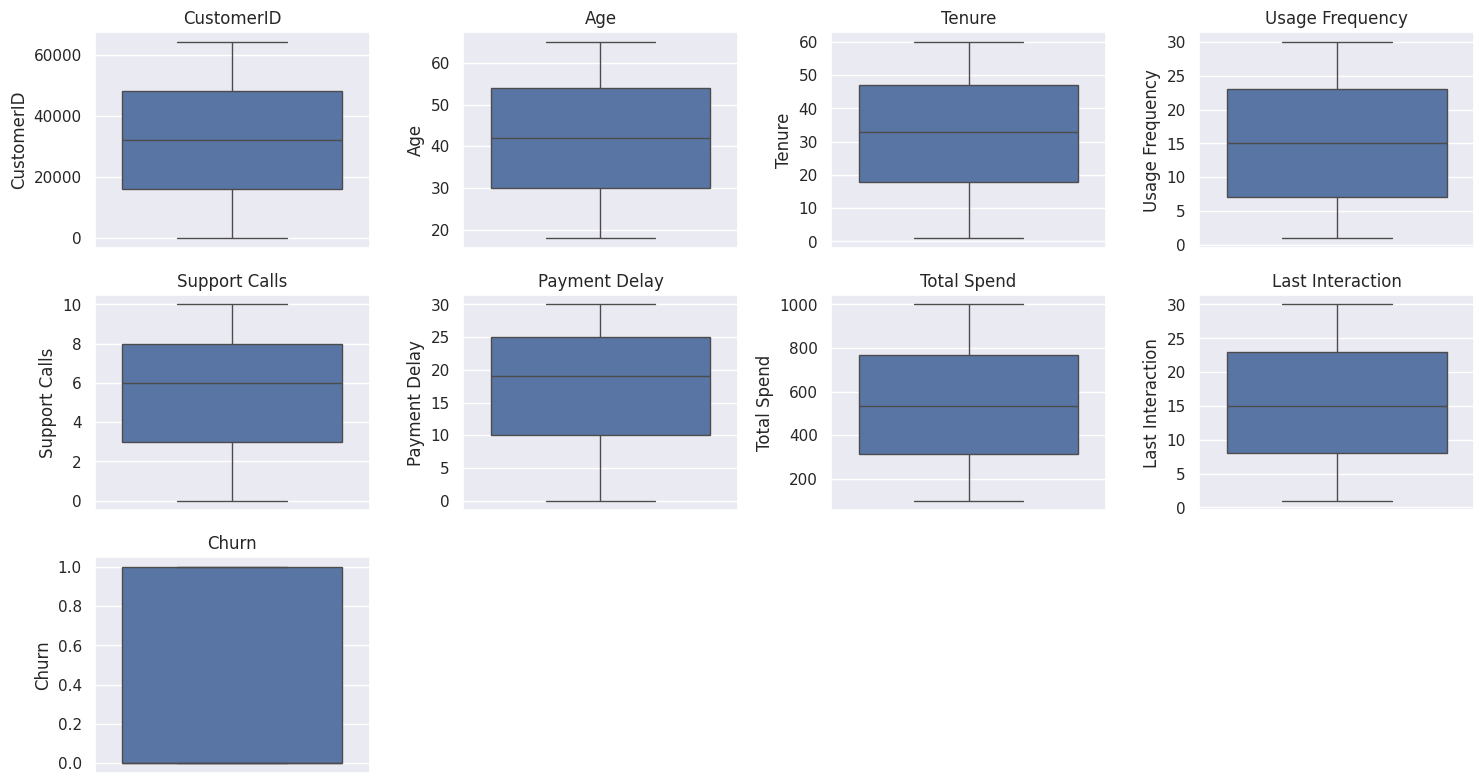

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


IQR

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

CustomerID: 0 outliers
Age: 0 outliers
Tenure: 0 outliers
Usage Frequency: 0 outliers
Support Calls: 0 outliers
Payment Delay: 0 outliers
Total Spend: 0 outliers
Last Interaction: 0 outliers
Churn: 0 outliers


Tidak ada outliers

Encoding Data Kategorik

In [ ]:
categorical_cols = data.select_dtypes(include=object).columns.tolist()
print(categorical_cols)

['Gender', 'Subscription Type', 'Contract Length']


In [ ]:
#melihat isi dalam kolom
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# Kode Gender
gender_mapping = {'Male': 1, 'Female': 0}

# Kolom Gender
data['Gender'] = data['Gender'].map(gender_mapping)

# Cek setelah Encoding
print(data[['Gender']].head())

   Gender
0       0
1       0
2       1
3       1
4       0


In [ ]:
data['Gender'].unique()

array([0, 1])

In [ ]:
#melihat isi dalam kolom
data['Subscription Type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [ ]:
import pandas as pd

# Tentukan urutan kategori
order = ['Basic', 'Standard', 'Premium']

# Konversi ke tipe kategori dengan urutan
data['Subscription Type'] = pd.Categorical(data['Subscription Type'], categories=order, ordered=True)

# Custom mapping dictionary
mapping = {'Basic': 1, 'Standard': 2, 'Premium': 3}

# Apply custom mapping
data['Subscription Type'] = data['Subscription Type'].map(mapping)

#Ubah tipe data menjadi data numerik
data['Subscription Type'] = data['Subscription Type'].astype(int)

# Cek hasil encoding
print(data['Subscription Type'].unique())

[1 2 3]


In [ ]:
#Melihat isi kolom
data['Contract Length'].unique()

array(['Monthly', 'Annual', 'Quarterly'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features (excluding 'CustomerID' which is likely an identifier)
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your numerical data and transform it
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Fit dan transform data 'Contract Length'
data['Contract Length Encoded'] = le.fit_transform(data['Contract Length'])

# Hapus kolom 'Contract Length' asli (opsional)
# data = data.drop('Contract Length', axis=1)

# Tampilkan data
print(data[['Contract Length', 'Contract Length Encoded']].head())

  Contract Length  Contract Length Encoded
0         Monthly                        1
1         Monthly                        1
2          Annual                        0
3       Quarterly                        2
4          Annual                        0


In [ ]:
data = data.drop(['Contract Length'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               64374 non-null  int64  
 1   Age                      64374 non-null  float64
 2   Gender                   64374 non-null  int64  
 3   Tenure                   64374 non-null  float64
 4   Usage Frequency          64374 non-null  float64
 5   Support Calls            64374 non-null  float64
 6   Payment Delay            64374 non-null  float64
 7   Subscription Type        64374 non-null  int64  
 8   Total Spend              64374 non-null  float64
 9   Last Interaction         64374 non-null  float64
 10  Churn                    64374 non-null  int64  
 11  Contract Length Encoded  64374 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 5.9 MB


In [ ]:
# Simpan DataFrame ke file CSV bernama 'data_preprocessed.csv'
data.to_csv('data_preprocessed.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
kesehatanmental=pd.read_csv('churn.csv')

In [ ]:
data.head()

CustomerID       Age  Gender    Tenure  Usage Frequency  Support Calls  \
0           1 -1.434202       0 -0.409100        -0.122526      -0.449807   
1           2 -0.069730       0 -0.233642         1.465424       0.513590   
2           3  0.361155       1 -0.292128        -0.576225      -1.092072   
3           4 -0.500616       1 -1.344876        -0.349375      -0.128674   
4           5  0.792041       0  1.520939         1.011724       1.155855   

   Payment Delay  Subscription Type  Total Spend  Last Interaction  Churn  \
0       1.114538                  1     0.218408         -0.752324      1   
1      -0.467000                  2     0.164742          0.521065      0   
2       1.340472                  3     0.827900          0.636827      0   
3      -0.015132                  3    -1.184575          0.289540      0   
4      -1.709637                  2    -0.030756          0.289540      0   

   Contract Length Encoded  
0                        1  
1                        1  
2                        0  
3                        2  
4                        0

In [ ]:
kesehatanmental.tail(15)

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
64359       64360   25  Female      27               12              2   
64360       64361   18    Male      59                5              9   
64361       64362   53  Female      48                3              7   
64362       64363   38    Male      38               29              8   
64363       64364   64  Female      55                1             10   
64364       64365   48  Female      36               22              4   
64365       64366   26  Female      54               24              2   
64366       64367   64    Male      30               27              9   
64367       64368   51    Male      47               17             10   
64368       64369   45    Male       3                1              5   
64369       64370   45  Female      33               12              6   
64370       64371   37    Male       6                1              5   
64371       64372   25    Male      39               14              8   
64372       64373   50  Female      18               19              7   
64373       64374   52  Female      45               15              9   

       Payment Delay Subscription Type Contract Length  Total Spend  \
64359             25          Standard          Annual          393   
64360             30             Basic         Monthly          696   
64361             17          Standard          Annual          499   
64362             29           Premium       Quarterly          242   
64363              3           Premium         Monthly          270   
64364             22           Premium          Annual          342   
64365             21             Basic          Annual          165   
64366             28           Premium          Annual          884   
64367             26             Basic          Annual          544   
64368             11          Standard          Annual          218   
64369             21             Basic       Quarterly          947   
64370             22          Standard          Annual          923   
64371             30           Premium         Monthly          327   
64372             22          Standard         Monthly          540   
64373             25          Standard         Monthly          696   

       Last Interaction  Churn  
64359                 9      1  
64360                22      1  
64361                20      1  
64362                 4      1  
64363                13      1  
64364                 9      1  
64365                23      1  
64366                21      1  
64367                24      1  
64368                15      1  
64369                14      1  
64370                 9      1  
64371                20      1  
64372                13      1  
64373                22      1

In [ ]:
count_values = kesehatanmental['Churn'].value_counts()
count_values

Churn
0    33881
1    30493
Name: count, dtype: int64

In [ ]:
# Menghitung rata-rata berdasarkan nilai 'Churn'
mean_by_Churn = data.groupby('Churn').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Churn'
print(mean_by_Churn)

         CustomerID       Age    Gender    Tenure  Usage Frequency  \
Churn                                                                
0      22846.794959 -0.060201  0.544228 -0.185304         0.109192   
1      42566.027121  0.066889  0.379825  0.205893        -0.121324   

       Support Calls  Payment Delay  Subscription Type  Total Spend  \
Churn                                                                 
0          -0.288999      -0.528783           2.010803     0.074820   
1           0.321109       0.587535           1.987013    -0.083133   

       Last Interaction  Contract Length Encoded  
Churn                                             
0              0.002673                 1.004191  
1             -0.002970                 0.976454  


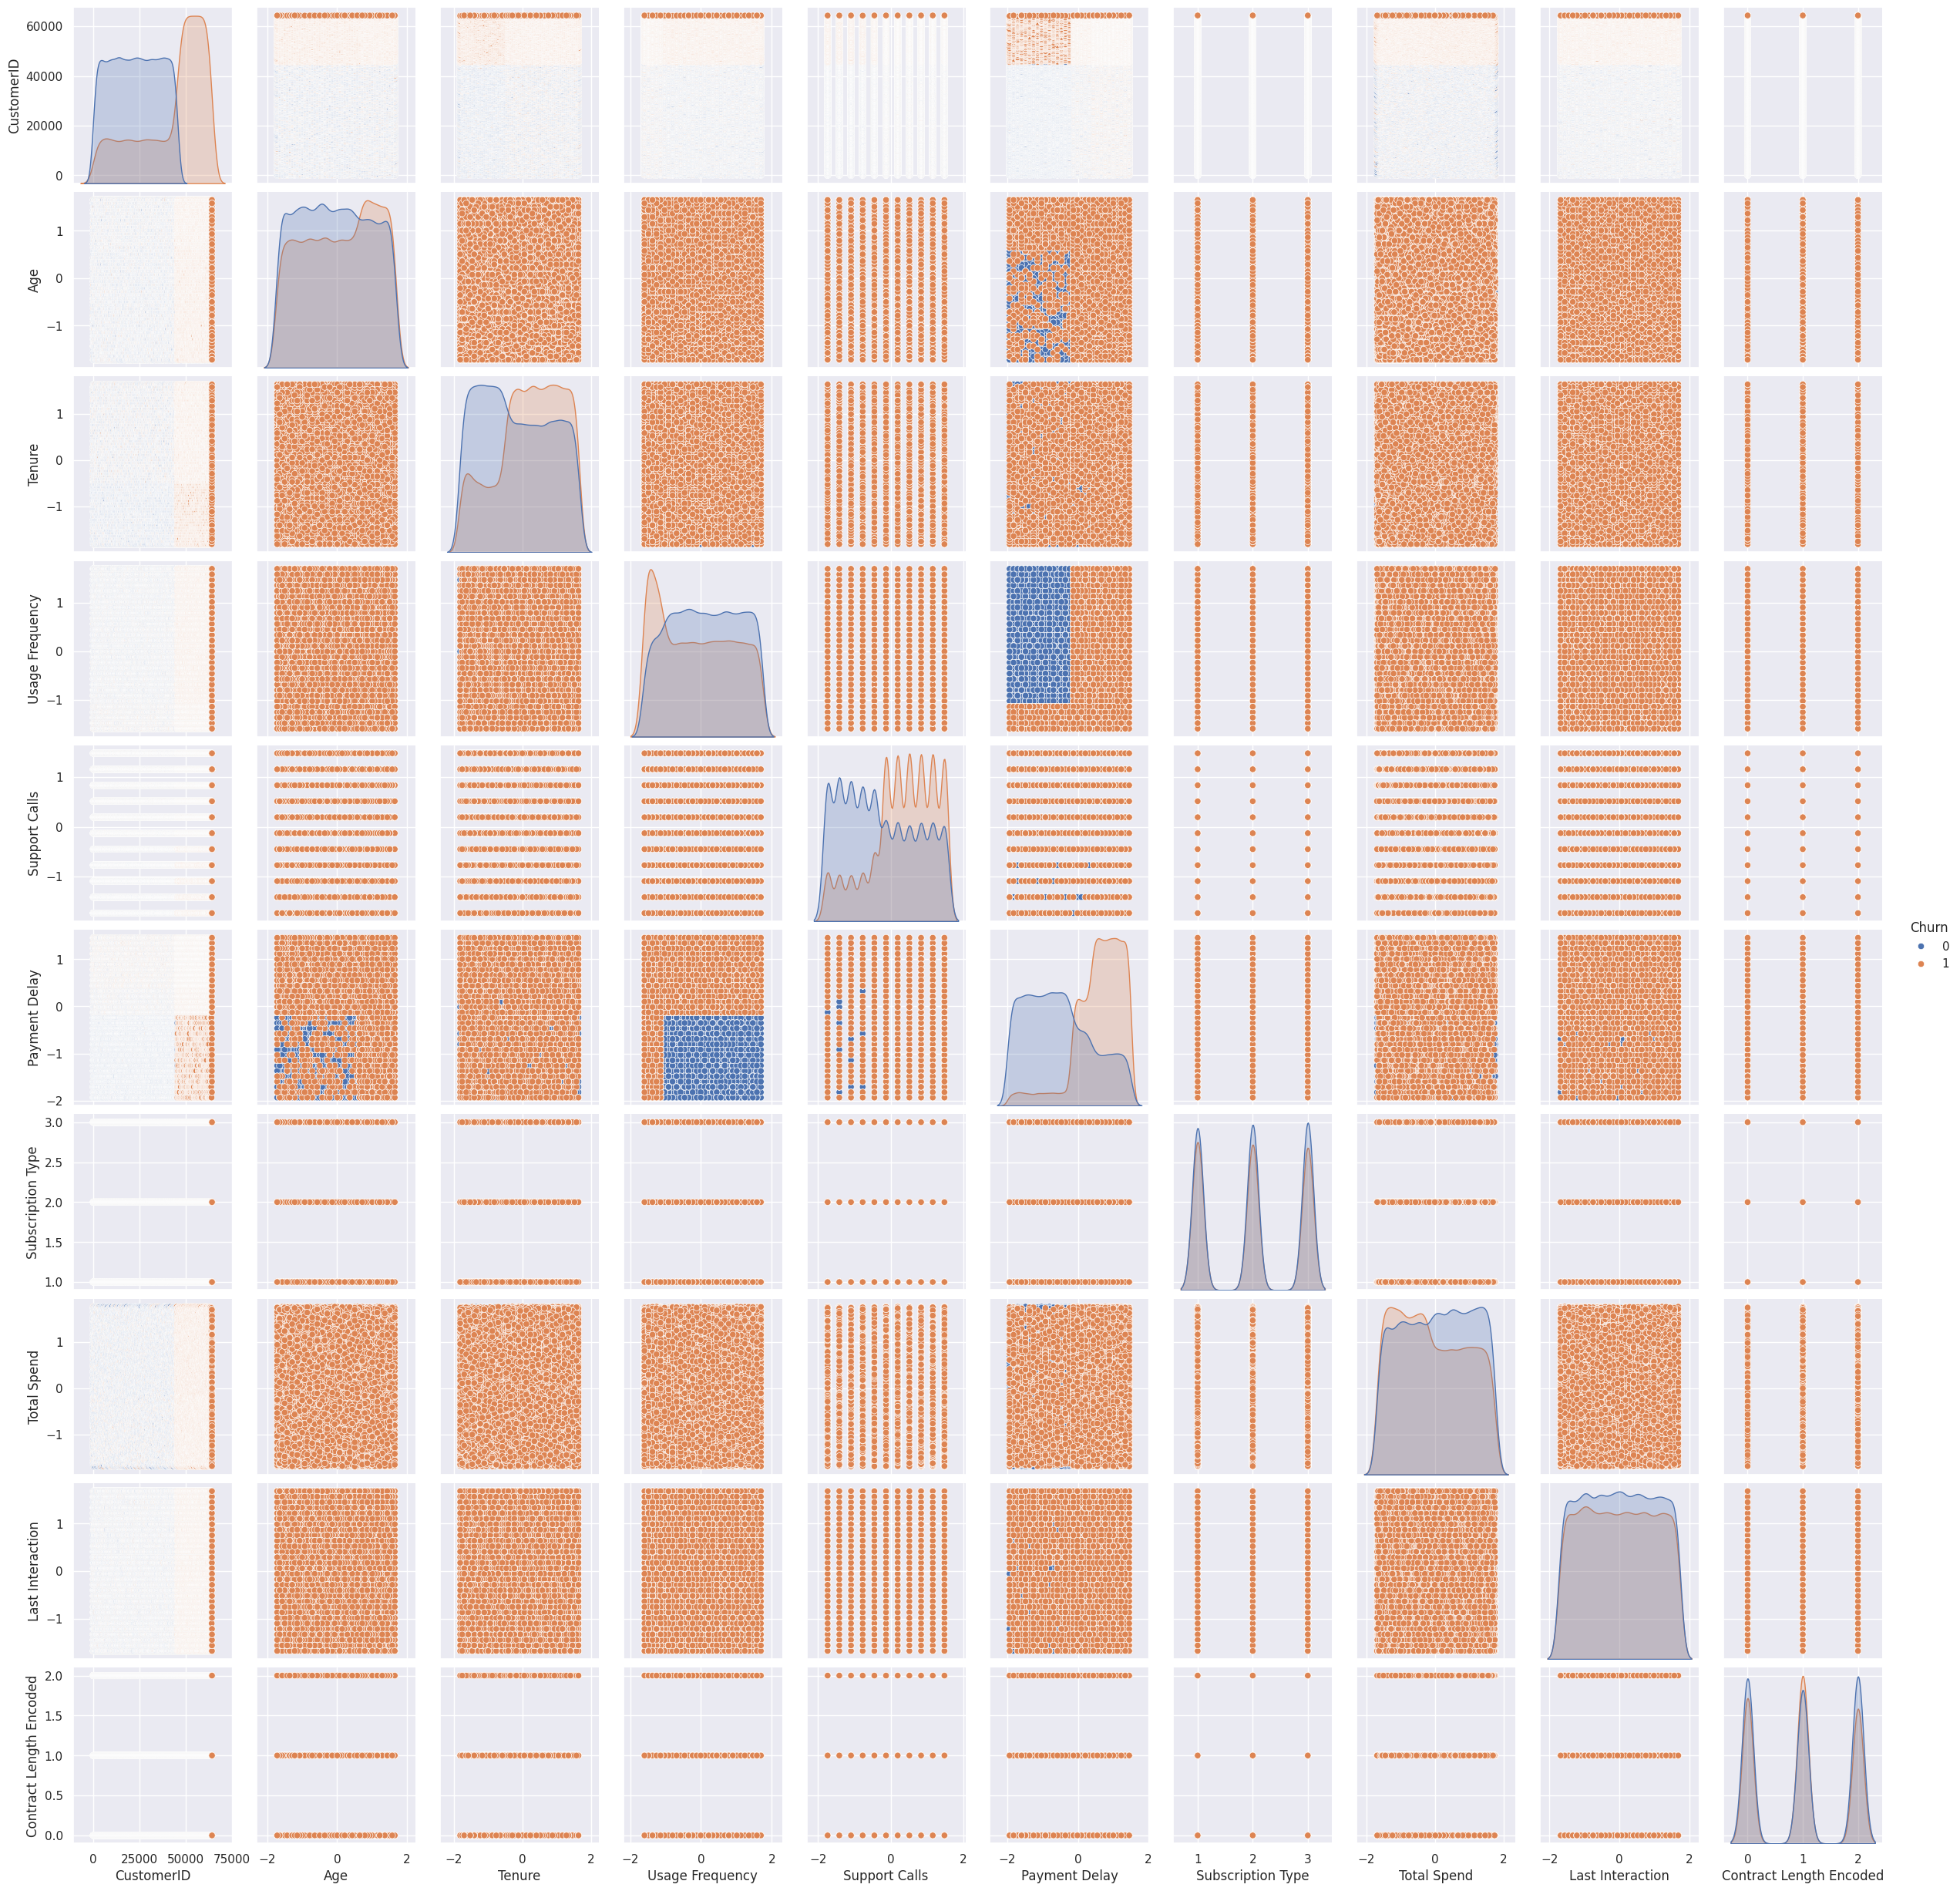

In [ ]:
#visualisasi. warna dibedakan berdasarkan outcomenya apakah Customer Churn atau tidak
sns.pairplot(data, vars=['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type','Total Spend','Last Interaction','Contract Length Encoded'], hue='Churn')

In [ ]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'Churn'
correlation_with_Churn = data.corr()['Churn'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Churn'
print(correlation_with_Churn)


Churn                      1.000000
Payment Delay              0.557386
CustomerID                 0.529832
Support Calls              0.304631
Tenure                     0.195327
Age                        0.063457
Last Interaction          -0.002818
Subscription Type         -0.014555
Contract Length Encoded   -0.017098
Total Spend               -0.078867
Usage Frequency           -0.115098
Gender                    -0.164549
Name: Churn, dtype: float64


In [ ]:
#memisahkan data menjadi variabel x dan y
X=data.drop(['Churn'], axis=1)
y=data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.63846644 0.63829787 0.         ... 0.65       0.44827586 1.        ]
 [0.94991689 0.08510638 0.         ... 0.99666667 0.20689655 0.5       ]
 [0.56460007 0.87234043 1.         ... 0.81888889 0.86206897 0.5       ]
 ...
 [0.66197008 0.57446809 0.         ... 0.00333333 0.86206897 1.        ]
 [0.67678996 0.25531915 1.         ... 0.59666667 0.06896552 0.5       ]
 [0.04244015 0.10638298 1.         ... 0.42333333 0.89655172 0.        ]]


NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()

In [ ]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.8686382259849705

In [ ]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [ ]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.8726


Model dengan Neural Network

In [ ]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [ ]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 100}


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6777
           1       0.95      0.98      0.96      6098

    accuracy                           0.97     12875
   macro avg       0.96      0.97      0.97     12875
weighted avg       0.97      0.97      0.97     12875



In [ ]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.965